In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data

In [23]:
raw_data = pd.read_csv("car sales data.csv")
raw_data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Data Cleaning


## Needed features 

In [24]:
data = raw_data.drop(["Model"], axis = 1)
data.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Cleaning Data

In [25]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [26]:
data_with_no_mv = data.dropna(axis = 0)
data_with_no_mv.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Data Exploring

C:\Users\Mehedi\AppData\Local\Temp\ipykernel_13244\635234624.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_with_no_mv["Price"], ax= axes[0, 0])
C:\Users\Mehedi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mehedi\AppData\Local\Temp\ipykernel_13244\635234624.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level func

<Axes: xlabel='Year', ylabel='Density'>

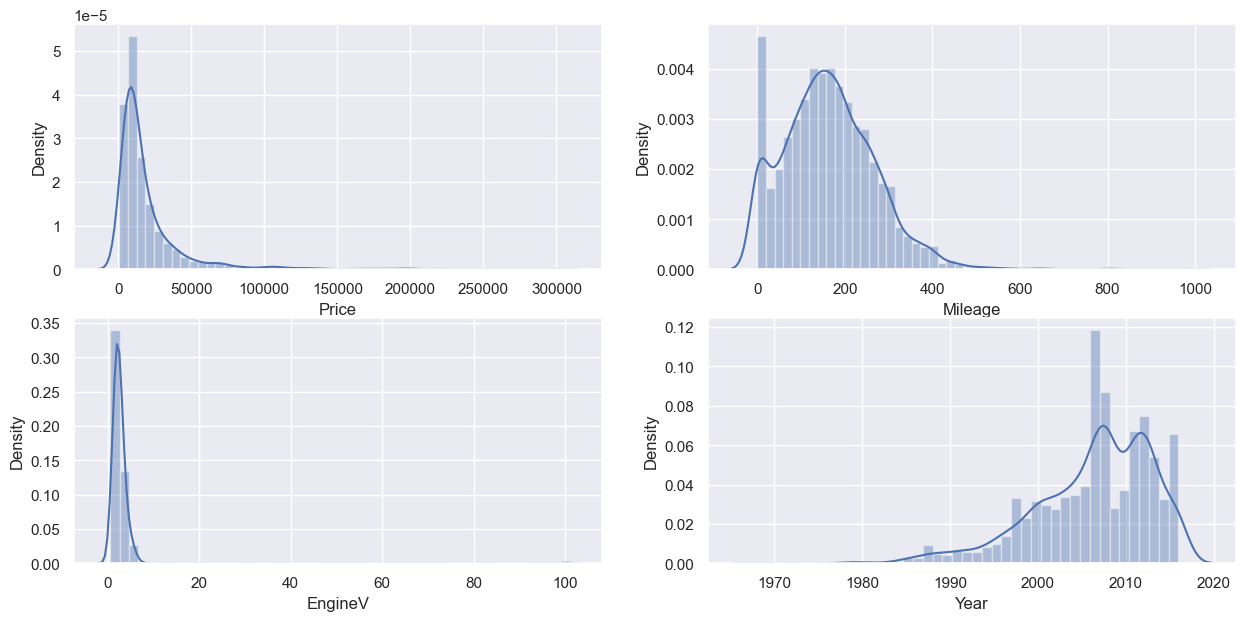

In [27]:
fig, axes = plt.subplots(2,2, figsize=(15,7))
sns.distplot(data_with_no_mv["Price"], ax= axes[0, 0])
sns.distplot(data_with_no_mv["Mileage"], ax= axes[0,1])
sns.distplot(data_with_no_mv["EngineV"], ax= axes[1,0])
sns.distplot(data_with_no_mv["Year"], ax= axes[1,1])

## Quantiling data

In [28]:
quantiled_price_val = data_with_no_mv["Price"] < data_with_no_mv["Price"].quantile(.99)
quantiled_engine_val = data_with_no_mv["EngineV"] < 6.5
quantiled_mileage_val = data_with_no_mv["Mileage"] < data_with_no_mv["Mileage"].quantile(.99)
quantiled_year_val = data_with_no_mv["Year"] > data_with_no_mv["Year"].quantile(.01)

In [29]:
#quantiled_price_val = data_with_no_mv["Price"].quantile(.99)
cleaned_df = data_with_no_mv[(quantiled_price_val) & (quantiled_engine_val) & 
                               (quantiled_mileage_val) & (quantiled_year_val)]

cleaned_df = cleaned_df.reset_index(drop = True)
cleaned_df


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [30]:
cleaned_df.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Visualization after quantiling

C:\Users\Mehedi\AppData\Local\Temp\ipykernel_13244\1626043674.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df["Price"], ax= axes[0, 0])
C:\Users\Mehedi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mehedi\AppData\Local\Temp\ipykernel_13244\1626043674.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functio

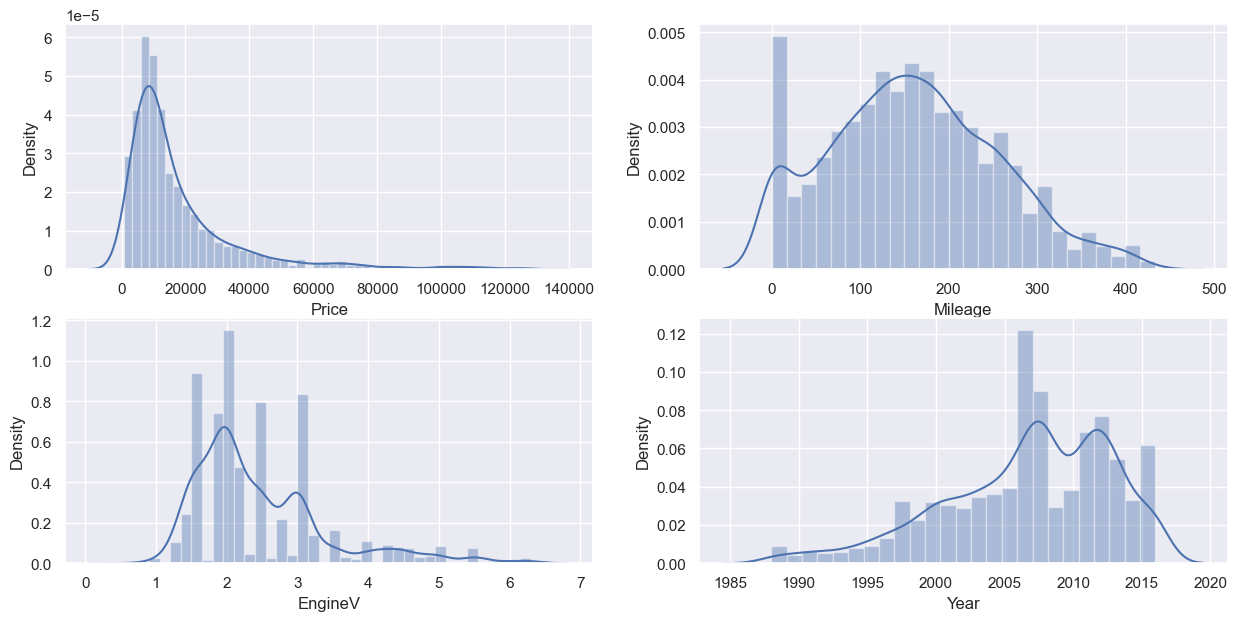

In [31]:
fig, axes = plt.subplots(2,2, figsize=(15,7))
sns.distplot(cleaned_df["Price"], ax= axes[0, 0])
sns.distplot(cleaned_df["Mileage"], ax= axes[0, 1])
sns.distplot(cleaned_df["EngineV"], ax= axes[1, 0])
sns.distplot(cleaned_df["Year"], ax= axes[1, 1])

plt.show()

## OLS Assumptions

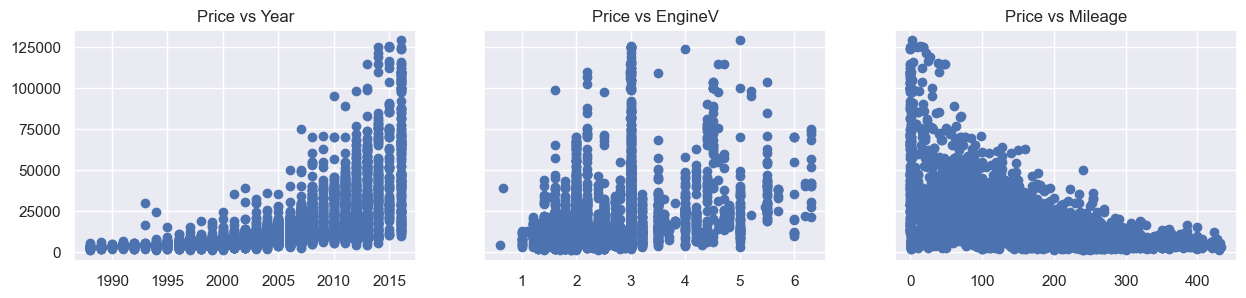

In [32]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(15,3))
axes[0].scatter(cleaned_df["Year"], cleaned_df["Price"])
axes[0].set_title("Price vs Year")

axes[1].scatter(cleaned_df["EngineV"], cleaned_df["Price"])
axes[1].set_title("Price vs EngineV")

axes[2].scatter(cleaned_df["Mileage"], cleaned_df["Price"])
axes[2].set_title("Price vs Mileage")

plt.show()

## Price Standardization

In [33]:
log_price = np.log(cleaned_df["Price"])
cleaned_df["Log Price"] = log_price
cleaned_df = cleaned_df.drop(["Price"], axis = 1)
cleaned_df

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3861,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


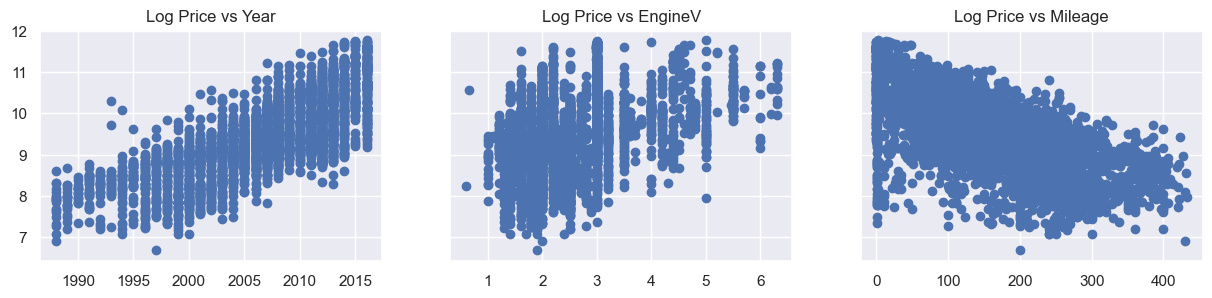

In [34]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(15,3))

axes[0].scatter(cleaned_df["Year"], cleaned_df["Log Price"])
axes[0].set_title("Log Price vs Year")

axes[1].scatter(cleaned_df["EngineV"], cleaned_df["Log Price"])
axes[1].set_title("Log Price vs EngineV")

axes[2].scatter(cleaned_df["Mileage"], cleaned_df["Log Price"])
axes[2].set_title("Log Price vs Mileage")

plt.show()

## Multicolinearity 

In [35]:
ind_var = cleaned_df[["Mileage","Year","EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(ind_var.values, i) for i in range(ind_var.shape[1])]
vif["features"] = ind_var.columns.values
vif

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [36]:
#data_no_multicolinearity = cleaned_df.drop(["Year"], axis = 1)
data_no_multicolinearity = cleaned_df

## Creating Dummies

In [37]:
data_with_dummies = pd.get_dummies(data_no_multicolinearity, drop_first = True)
data_with_dummies

,Mileage,EngineV,Year,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,1999,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,2003,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,2007,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,2011,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,163,2.5,2008,9.350102,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True
3862,35,1.6,2014,9.792556,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True
3863,9,3.0,2014,11.736069,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True
3864,1,3.5,1999,8.779557,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True


In [38]:
#data_with_dummies = data_with_dummies.drop(["Registration_yes"], axis = 1)
#data_with_dummies

In [39]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [40]:
cols = ['Log Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol','Registration_yes', "Year"]

In [41]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes,Year
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,1991
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,1999
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,2003
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,2007
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,9.350102,163,2.5,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,2008
3862,9.792556,35,1.6,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,2014
3863,11.736069,9,3.0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,2014
3864,8.779557,1,3.5,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True,1999


# Linear Regression Model

## Inputs and Targets

In [42]:
targets = data_preprocessed["Log Price"]
inputs = data_preprocessed.drop(["Log Price"], axis = 1)

## Standardization

In [43]:
scaler = StandardScaler()
scaler.fit(inputs)

input_scaled = scaler.transform(inputs)


## Train and Split Data

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size = 0.2, random_state = 365)

## Create Regression

In [46]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [47]:
y_hat = reg.predict(x_train)

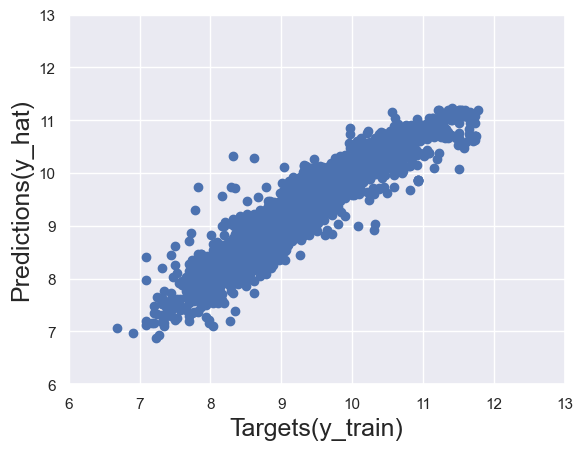

In [48]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets(y_train)", size = 18)
plt.ylabel("Predictions(y_hat)", size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [49]:
reg.score(x_train, y_train)

0.8821443309985956

C:\Users\Mehedi\AppData\Local\Temp\ipykernel_13244\673607322.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)
C:\Users\Mehedi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Log Price', ylabel='Density'>

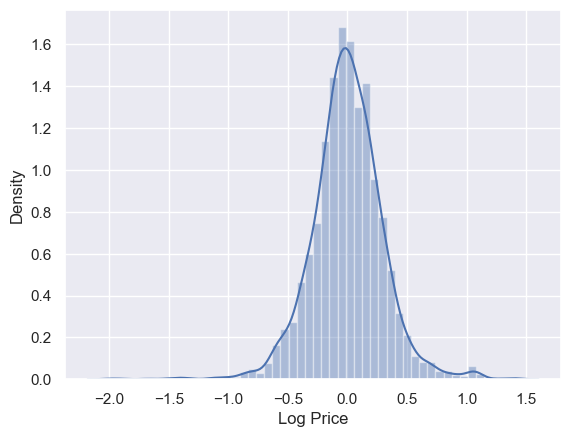

In [50]:
sns.distplot(y_train - y_hat)

## Finding Weights and Bias 

In [51]:
reg.intercept_

9.412998285320976

In [52]:
reg_summery = pd.DataFrame(inputs.columns.values, columns = ["Features"])
reg_summery["Weights"] = reg.coef_
reg_summery

,Features,Weights
0,Mileage,-0.107121
1,EngineV,0.216525
2,Brand_BMW,0.024181
3,Brand_Mercedes-Benz,-0.000852
4,Brand_Mitsubishi,-0.130290
5,Brand_Renault,-0.206275
6,Brand_Toyota,-0.075805
7,Brand_Volkswagen,-0.103814
8,Body_hatch,-0.097079
9,Body_other,-0.075627


# Test 

In [53]:
y_hat_test = reg.predict(x_test)

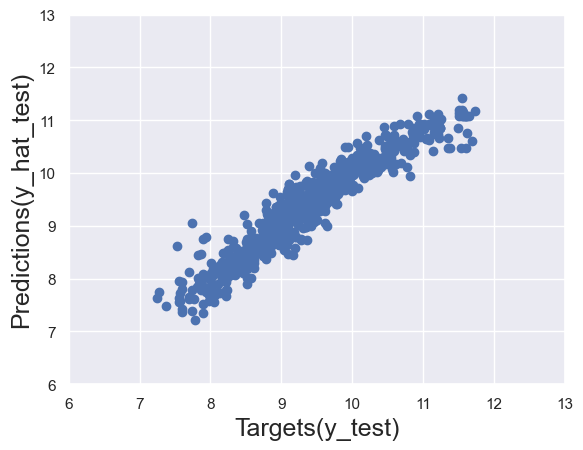

In [54]:
plt.scatter(y_test, y_hat_test)
plt.xlabel("Targets(y_test)", size = 18)
plt.ylabel("Predictions(y_hat_test)", size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [55]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ["Predictions"])
df_pf

,Predictions
0,8472.390425
1,12226.297105
2,8395.174351
3,7265.200124
4,8863.509552
...,...
769,26644.138410
770,4764.624369
771,18384.403266
772,33364.331225


In [56]:
y_test_new_index = y_test.reset_index(drop = True)
df_pf["Target"] = np.exp(y_test_new_index)
df_pf

,Predictions,Target
0,8472.390425,2300.0
1,12226.297105,13200.0
2,8395.174351,8100.0
3,7265.200124,6400.0
4,8863.509552,9150.0
...,...,...
769,26644.138410,29500.0
770,4764.624369,5300.0
771,18384.403266,18300.0
772,33364.331225,68500.0


In [57]:
df_pf["Residual"] = df_pf["Target"] - df_pf["Predictions"] 


In [58]:
df_pf["Difference %"] = np.absolute((df_pf["Predictions"] - df_pf["Target"])/df_pf["Target"]*100)
df_pf

,Predictions,Target,Residual,Difference %
0,8472.390425,2300.0,-6172.390425,268.364801
1,12226.297105,13200.0,973.702895,7.376537
2,8395.174351,8100.0,-295.174351,3.644128
3,7265.200124,6400.0,-865.200124,13.518752
4,8863.509552,9150.0,286.490448,3.131043
...,...,...,...,...
769,26644.138410,29500.0,2855.861590,9.680887
770,4764.624369,5300.0,535.375631,10.101427
771,18384.403266,18300.0,-84.403266,0.461220
772,33364.331225,68500.0,35135.668775,51.292947


In [59]:
df_pf.sort_values(by = ["Difference %"])

,Predictions,Target,Residual,Difference %
610,8202.776857,8200.00,-2.776857,0.033864
178,21045.946577,21000.00,-45.946577,0.218793
391,51923.295722,52055.25,131.954278,0.253489
452,37796.067131,37700.00,-96.067131,0.254820
615,8523.203879,8500.00,-23.203879,0.272987
...,...,...,...,...
245,21175.118028,9800.00,-11375.118028,116.072633
465,6267.061346,2700.00,-3567.061346,132.113383
182,6535.733166,2800.00,-3735.733166,133.419042
629,5493.202232,1850.00,-3643.202232,196.929850


In [60]:
reg.score(x_test, y_test)

0.8985765457657787